<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.04/bds_algoritmos_006_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Modelos supervisados: Árbol de Decisión para Regresión con `scikit_learn`</font>**


<p align="justify">
En este cuaderno, presentamos cómo funcionan los <b>árboles de decisión en problemas de regresión</b>.
<br>
<br>
Los árboles de decisión en regresión son una técnica utilizada en el aprendizaje automático (machine learning) para realizar predicciones numéricas.
<br>
<br>
A diferencia de los árboles de decisión en clasificación, que se utilizan para predecir clases o categorías discretas, <mark>los árboles de decisión en regresión se emplean para predecir valores continuos</mark>.



<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-003.png?raw=true" width="450">
</p>

<p align="justify">
Un árbol de decisión en regresión es una estructura de árbol donde cada nodo interno representa una prueba o condición sobre una variable explicativa del conjunto de datos. Los nodos hoja o terminales del árbol contienen las predicciones numéricas. Cada vez que se realiza una prueba en un nodo interno, se sigue uno de los caminos a través de las ramas del árbol hasta llegar a una hoja, que proporciona la predicción.
<br>
<br>
La construcción de un árbol de decisión implica dividir sucesivamente el conjunto de datos en subconjuntos más pequeños generando regiones no solapadas: $R_1, R_2,R_3,...,R_j$, para luego realizar la predicción de la variable respuesta en cada región. Es necesario establecer una metodología que permita crear las regiones, o lo que es equivalente, decidir donde se introducen las divisiones (umbrales): en que variables explicativas o predictoras y en que valores de las mismos. Es en este punto donde se diferencian lo algoritmos de árboles de regresión y clasificación.
<br>
<br>
En los árboles de regresión, la forma para identificar las divisiones es utilizando el <b>método de mínimos cuadrados</b>. El objetivo es encontrar las  $j$ regiones $(R_1 ,...,  R_j)$ que minimizan la suma de los errores o residuos al cuadrado totales:
<br>
<br>
$$min\sum_{j=1}^J  \displaystyle\sum_{i \in R_j}(y_i -\hat{y}_{R_j})^2$$
<br>
donde  $\hat{y}_{R_j}$ es la media de la variable respuesta en la región  $R_j$
<br>
<br>
En resumen, se busca una distribución de regiones tal que, la sumatoria de los errores al cuadrado entre las observaciones (valores reales) y la media de la región (valor pronosticado) a la que pertenecen sea lo menor posible. Es decir, que los valores pronosticados sean lo más cercanos posible a los valores reales.

<p align="justify">
Una vez construido el árbol, se puede utilizar para realizar predicciones sobre nuevos datos. Para ello, se sigue el camino a través del árbol según las condiciones de las pruebas en cada nodo, hasta llegar a una hoja que proporciona la predicción numérica.

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-004.png?raw=true" width="400">
</p>

<p align="justify">
Los árboles de decisión en regresión son ampliamente utilizados debido a su simplicidad interpretativa y su capacidad para modelar relaciones no lineales. Sin embargo, también pueden ser propensos a sobreajuste si no se controla adecuadamente, lo que puede resultar en un mal rendimiento en datos nuevos.
<br>
<br>
Para mitigar este problema, se pueden aplicar técnicas como la poda del árbol, la limitación de la profundidad máxima o el uso de múltiples árboles en conjunto (<code>ensamble</code>) para mejorar la precisión y la generalización del modelo.

## **<font color="DeepPink">Bibliotecas**

In [1]:
# Operaciones matemáticas y estadísticas
import pandas as pd
import numpy as np

In [2]:
# Visualización
import plotly.express as px
import plotly.graph_objs as go

## **<font color="DeepPink">Conjunto de Datos**

<p align="justify">
Primero, cargamos el conjunto de datos de la empresa de comercio electrónico específicamente para resolver un problema de regresión.

In [10]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/Ecommerce_Customers.csv"

In [11]:
datos = pd.read_csv(url)

In [12]:
datos.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<p align="justify">
Es una empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento sobre estilo y ropa en la tienda. Los clientes que vienen a la tienda, tienen sesiones/reuniones con un estilista personal, luego pueden ordenar a través de una aplicación móvil o sitio web la ropa que desean.
<br>
<br>
Intentan identificar si debe enfocarse en mejorar su experiencia de aplicación movil o en su página web.
<br>
<br>
Este es un conjunto de datos de los clientes de la empresa. El cual tiene información del cliente, como correo electrónico, dirección postal y su color de avatar.
<br>
<br>
También tiene columnas de valores numéricos:

* **Avg. Session Length**: duración promedio de sesiones de asesoramiento de estilo en la tienda.

* **Time on App**: tiempo promedio de permanencia en la aplicación en minutos.

* **Time on Website**: tiempo promedio de permanencia en el sitio web en minutos.

* **Length of Membership**: cuántos años ha sido miembro el cliente.

* **Yearly Amount Spent**: monto anual gastado en la plataforma.





In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Descartamos las columnas que no son últiles con el método `drop()`.

In [14]:
datos= datos.drop(["Avatar","Email","Address"],axis=1)

Renombramos las columnas con el método `rename()`.

In [15]:
datos.rename(columns={"Avg. Session Length": "Tiempo_sesión",
                      "Time on App":"Tiempo_app",
                      "Time on Website":"Tiempo_web",
                      "Length of Membership":"Años_miembro",
                      "Yearly Amount Spent":"Gasto_anual"},
             inplace=True)

In [16]:
datos.head()

,Tiempo_sesión,Tiempo_app,Tiempo_web,Años_miembro,Gasto_anual
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


 ## **<font color="DeepPink">División del conjunto de datos</font>**

In [17]:
#X = datos[["Tiempo_sesión","Tiempo_app","Tiempo_web","Años_miembro"]]
X = datos[["Tiempo_app"]]
y = datos["Gasto_anual"]

<p align="justify">
👀 División del conjunto de entrenamiento y prueba.
</p>


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=123)

In [19]:
X_train.shape

(375, 1)

In [20]:
X_test.shape

(125, 1)

In [21]:
y_train.shape

(375,)

In [22]:
y_test.shape

(125,)

## **<font color="DeepPink">Análisis Gráfico**

Primero ilustraremos la diferencia entre un modelo de **regresión lineal** y un **árbol de decisión**.

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
prediction = linear_model.predict(X_test)
prediction[:10]

array([458.15883227, 516.76734685, 549.21488828, 459.45937468,
       490.25668002, 515.29865179, 499.5390656 , 534.28507942,
       458.22973591, 492.59436231])

In [24]:
linear_model.score(X_test, y_test)

0.22400695636628387

In [25]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            name = "Regresión Lineal")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
En el gráfico anterior, vemos que una regresión lineal puede ajustar estos datos. Una característica de este modelo es que todas las nuevas predicciones estarán en la línea.

In [26]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            name = "Regresión Lineal"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            mode = "markers",
                            marker=dict(size=8),
                            name = "Predicción")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
En contraste con los modelos lineales, los árboles de decisión se caracterizan por ser <b>modelos no paramétricos</b>, lo cual implica que no representan la relación entre las variables mediante una función matemática predefinida.
<br>
<br>
A continuación, se contrasta el árbol de decisión para regresión con el modelo lineal anteriormente planteado.

## **<font color="DeepPink">Creación del modelo**

Documentación [Árbol de Decisión para Regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


<p align="justify">
En este ejemplo, se crea un de árbol de decisión para regresión mediante la clase <code>DecisionTreeRegressor()</code> de <code>scikit_learn</code>. Luego, se ajusta el modelo a los datos de entrenamiento utilizando el método <code>fit()</code>, donde <code>X_train</code> representa la variabre predictora de entrenamiento e <code>y_train</code> es la variable objetivo de entrenamiento. Una vez ajustado el modelo, se pueden realizar predicciones en los datos de prueba utilizando el método <code>predict()</code>.
<br>
<br>
Cuando se utiliza <code>max_depth=1</code>, se crea un árbol de decisión con solo un nivel de profundidad. Esto significa que el árbol solo tiene un nodo raíz y dos nodos hoja o terminales.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
prediction[:10]

array([477.18445196, 545.80850726, 545.80850726, 477.18445196,
       477.18445196, 545.80850726, 477.18445196, 545.80850726,
       477.18445196, 477.18445196])

In [28]:
tree.score(X_test, y_test)

0.13047400216848126

Profundidad del árbol: 1
Número de nodos terminales: 2


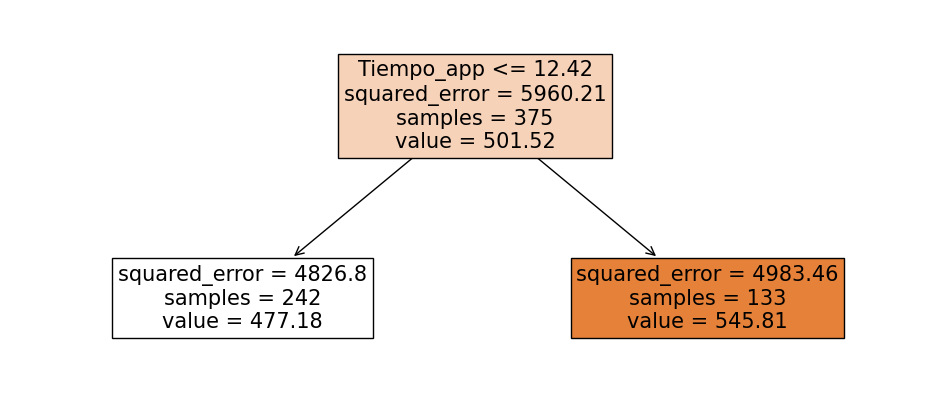

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {tree.get_depth()}")
print(f"Número de nodos terminales: {tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree,
            feature_names = X.columns,
            filled        = True,
            impurity      = True,
            fontsize      = 15,
            precision     = 2,
            ax            = ax
       )

In [31]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            mode='markers',
                            marker=dict(size=8),
                            name = "Árbol de decisión")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
El umbral para <code>Tiempo_app</code> es de 12.42 minutos. Los valores pronosticados a cada lado de la división son dos constantes: 477.18 y 545.81 dólares. Estos valores corresponden a los valores medios de las muestras de entrenamiento en cada región.


<p align="justify">
 El parámetro <code>max_depth</code> del algoritmo <code>DecisionTreeRegressor</code> especifica la profundidad máxima permitida para el árbol. La profundidad de un árbol de decisión se refiere a la longitud del camino más largo desde la raíz hasta una hoja (nodo terminal). Un valor más bajo restringirá la profundidad del árbol, lo que puede llevar a modelos más simples y menos propensos al sobreajuste. Por otro lado, un valor más alto permitirá árboles más profundos y complejos, lo que podría resultar en modelos más precisos pero también más propensos al sobreajuste.
<br>
<br>
 Es importante tener en cuenta que la elección óptima de <code>max_depth</code> depende del conjunto de datos y del problema específico. En general, se recomienda ajustar este parámetro mediante técnicas de validación cruzada u optimización de hiperparámetros para encontrar el equilibrio adecuado entre la complejidad y la capacidad de generalización del modelo.
<br>
<br>
Comprobemos el efecto de aumentar la profundidad:

In [33]:
tree_2 = DecisionTreeRegressor(max_depth=3)
tree_2.fit(X_train, y_train)
prediction_2 = tree_2.predict(X_test)
prediction_2[:10]

array([452.23967485, 519.23995554, 540.25357874, 452.23967485,
       479.35999582, 519.23995554, 502.77785539, 540.25357874,
       452.23967485, 479.35999582])

In [34]:
tree_2.score(X_test, y_test)

0.1760806420864538

Profundidad del árbol: 3
Número de nodos terminales: 8


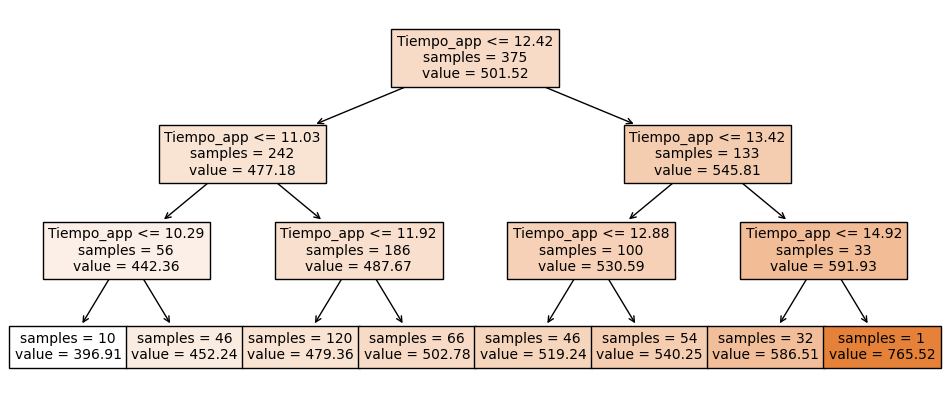

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {tree_2.get_depth()}")
print(f"Número de nodos terminales: {tree_2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_2,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [39]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction_2,
                            mode='markers',
                            marker=dict(size=8),
                            name = "Árbol de decisión")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
Aumentar la profundidad del árbol aumentará el número de regiones y, por lo tanto, el número de valores constantes que el árbol es capaz de predecir (nodos terminales).

<p align="justify">
Los parámetros <code>min_sample_leaf</code> y <code>min_samples_split</code> del algoritmo <code>DecisionTreeRegressor</code> permiten controlar la complejidad del árbol de decisión y evitar divisiones que puedan conducir a nodos con muy pocas muestras, lo que podría resultar en un sobreajuste. Al aumentar estos valores, se obtendrá un árbol de decisión más generalizado y menos complejo.


- `min_samples_leaf` especifica el número mínimo de muestras requeridas para que un nodo sea considerado una hoja (nodo terminal) en el árbol de decisión. Si el número de muestras en un nodo es menor que `min_samples_leaf`, no se realizará una división en ese nodo y se convertirá en una hoja. Este parámetro ayuda a evitar divisiones que produzcan hojas con muy pocas muestras, lo que puede ser útil para evitar sobreajuste. Garantiza un número mínimo de muestras en una hoja terminal.

- `min_samples_split` especifica el número mínimo de muestras requeridas para que se realice una división en un nodo. Si el número de muestras en un nodo es menor que `min_samples_split`, no se realizará ninguna división en ese nodo, y se convertirá en una hoja. Este parámetro controla la cantidad mínima de muestras necesarias para que un nodo sea elegible para realizar una división.

<br>
<p align="justify">
Comprobemos el efecto de incorporar el parámetro <code>min_samples_leaf</code>:

In [41]:
tree_3 = DecisionTreeRegressor(min_samples_leaf=40)
tree_3.fit(X_train, y_train)
prediction_3 = tree_3.predict(X_test)
prediction_2[:10]

array([452.23967485, 519.23995554, 540.25357874, 452.23967485,
       479.35999582, 519.23995554, 502.77785539, 540.25357874,
       452.23967485, 479.35999582])

In [42]:
tree_3.score(X_test, y_test)

0.17996819057804647

Profundidad del árbol: 4
Número de nodos terminales: 7


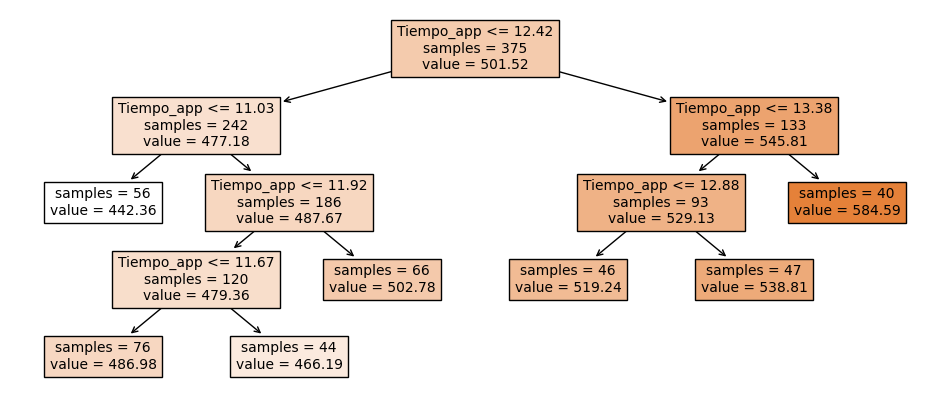

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {tree_3.get_depth()}")
print(f"Número de nodos terminales: {tree_3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_3,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:
<br><br>
✅ Utilizamos la biblioteca <code>scikit_learn</code> para entrenar un modelo de árbol de decisión en el contexto de un problema de regresión.
<br>
✅ Realizamos un análisis del comportamiento del árbol de decisión a través de la generación de un gráfico denominado <code>plot_tee</code>.



<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
